# Исследование профиля нелояльных клиентов банка «Метанпром»

**Автор:** Вячеслав Зайко

## Цель и задачи  

**Цель:** Провести исследовательский анализ данных клиентов банка «Метанпром» с выявлением портрета клиентов, которые склонны уходить из банка.   

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить взаимосвязь данных в столбце `Сhurn` с другими данными.
4. Сформулировать выводы по проведённому анализу.


## Данные

Для анализа поступили данные о клиентах банка «Метанпром». Данные состоят из двух датасетов:

- `bank_information.csv` — информация об использовании клиентом услуг банка;
- `clients_information.csv` —  персональная информация клиентов.

### Описание датасета `bank_information`

- `userid` — идентификатор клиента;
- `score` — баллы кредитного скоринга;
- `Objects` — количество объектов в собственности клиента;
- `Balance` — баланс на счёте клиента;
- `Products` — количество продуктов, которыми пользуется клиент;
- `CreditCard` — есть ли у клиента кредитная карта;
- `Loyalty` — считается ли клиент активным;
- `estimated_salary` — заработная плата клиента;
- `Churn` — ушёл ли клиент из банка.

### Описание датасета `clients_information`

- `userid` — идентификатор клиента;
- `LastName` — фамилия клиента;
- `FirstName` — имя клиента;
- `City` — город обращения в банк;
- `Gender` — пол;
- `Age` — возраст.


## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

---

## 1. Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `bank_information` и `clients_information`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `bank_df` и `clients_df`.

In [ ]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [ ]:
# Выгружаем данные в переменные bank_df и clients_df
bank_df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_information.csv')
clients_df = pd.read_csv('https://code.s3.yandex.net/datasets/clients_information.csv')

Познакомимся с данными датасета `bank_information.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [ ]:
# Выводим первые строки датафрейма на экран
bank_df.head()

,userid,score,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,2,NaN,1,1,1,101348.88,1
1,15690047,608,1,83807.86,1,0,1,112542.58,0
2,15662040,502,8,159660.80,3,1,0,113931.57,1
3,15744090,699,1,NaN,2,0,0,93826.63,0
4,15780624,850,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Выводим информацию о датафрейме
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   Objects           10000 non-null  int64  
 3   Balance           6383 non-null   float64
 4   Products          10000 non-null  int64  
 5   CreditCard        10000 non-null  int64  
 6   Loyalty           10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   Churn             10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.3 KB


Датасет `bank_information.csv` содержит 9 столбцов и 10000 строк, в которых представлена информация об использовании клиентами услуг банка.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов лучше привести к одному виду, например snake case.
- Все представленные данные содержат числовые значения и хранятся в типах данных `int64` или `float64`. Значения в столбцах `score`, `Objects`, `Products`, `CreditCard`, `Loyalty` и `Churn` представлены целыми числами. Часть их них показывает наличие у клиента того или иного признака и содержит значения 1 или 0 — размерность этих данных можно оптимизировать.
- Пропуски содержатся только в столбце `Balance`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `clients_information.csv`.

In [ ]:
# Выводим первые строки датафрейма на экран
clients_df.head()

,userid,LastName,FirstName,Age,Gender,City
0,15677338,Лапина,Евпраксия,42,Ж,Ярославль
1,15690047,Александрова,Акулина,41,Ж,Рыбинск
2,15662040,Лаврентьева,Анна,42,Ж,Ярославль
3,15744090,Никитина,Олимпиада,39,Ж,Ярославль
4,15780624,Некрасова,Майя,43,Ж,Рыбинск


In [ ]:
# Выводим информацию о датафрейме
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userid     10000 non-null  int64 
 1   LastName   10000 non-null  object
 2   FirstName  10000 non-null  object
 3   Age        10000 non-null  int64 
 4   Gender     10000 non-null  object
 5   City       10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


Датасет `clients_information.csv` содержит 6 столбцов и 10000 строк, в которых представлена информация о клиентах банка. По аналогии с предыдущим датасетом можно отметить, что:

- Названия столбцов лучше привести к единому виду, например snake case.
- Типы данных соответствуют содержимому. Тип данных для столбца `Age` можно оптимизировать с понижением размерности. Маловероятно, что он хранит сильно завышенные значения.
- Пропусков на первый взгляд нет, однако следует проверить в столбцах значения-индикаторы, которые могут говорить об отсутствии данных.
- Значения в столбцах соответствуют описанию.

Первичное знакомство показывает, что данные хорошего качества — в них практически нет пропущенных значений, а сами данные соответствуют описанию и выглядят корректными. Настало время следующего этапа — предобработки данных.

---

## 2. Предобработка данных

### 2.1. Меняем названия, или метки, столбцов датафрейма

Для переименования используем метод `rename()`, которому передадим словарь с новыми названиями столбцов. Однако сначала выведем все названия на экран — так будет удобнее составлять словарь.

In [ ]:
# Выводим названия столбцов датафрейма bank_df
bank_df.columns

Index(['userid', 'score', 'Objects', 'Balance', 'Products', 'CreditCard',
       'Loyalty', 'estimated_salary', 'Churn'],
      dtype='object')

In [ ]:
# Передаём методу rename() словарь с названиями столбцов
bank_df = bank_df.rename(columns={'userid': 'userid',
                                  'Objects': 'objects',
                                  'Balance': 'balance',
                                  'Products': 'products',
                                  'CreditCard': 'credit_card',
                                  'Loyalty': 'loyalty',
                                  'Churn': 'churn'})

В названиях столбцов мы поменяли стиль и исправили так называемый CamelCase. При CamelCase (англ. «верблюжий регистр») каждое слово начинается с большой буквы, а между словами нет пробелов и других символов.

Чтобы из CamelCase перейти в snake_case, необходимо все заглавные символы сделать строчными, а между словами добавить подчёркивание `_`. Напишем такую функцию:

In [ ]:
# Напишем функцию для корректировки названия столбцов из CamelCase в snake_case
def col_to_snake_case(df):
    """
    Функция приводит названия столбцов из CamelCase в snake_case.
    Пример: столбец FirstName станет first_name.
    В качестве аргументов принимает датафрейм.
    Перебирает столбцы и проверяет каждый столбец.
    Если первый символ является заглавной буквой, то он меняется на прописную.
    Если в названии отыскиваются другие заглавные буквы, перед ними вставляется символ
    подчёркивания, и буква меняется на прописную.
    Функция возвращает исправленный датафрейм.
    """

    for col in df.columns:
        str_bad = col
        if str_bad[0].isupper():
            str_bad = str_bad[0].lower() + str_bad[1:]
        for index_s, item_s in enumerate(str_bad):
            if item_s.isupper():
                str_bad = str_bad[:index_s] + '_' + str_bad[index_s].lower() + str_bad[index_s + 1:]
        df = df.rename(columns={col: str_bad})
    return df

В качестве аргумента функция принимает датафрейм. Она перебирает все значения `df.columns`, то есть названия столбцов. Условие  `if str_bad[0].isupper()` проверяет, является ли первая буква названия заглавной. Если да, то её регистр поменяется. Затем перебираются все символы названия столбца `for index_s, item_s in enumerate(str_bad)`. Если встречается ещё один заглавный символ, то его регистр также меняется на нижний, и перед символом добавляется знак `_`. Применим функцию к датафрейму `clients_df`:

In [ ]:
# Применяем функцию col_to_snake_case()
clients_df = col_to_snake_case(clients_df)

In [ ]:
# Выводим названия столбцов датафрейма clients_df
clients_df.columns

Index(['userid', 'last_name', 'first_name', 'age', 'gender', 'city'], dtype='object')

In [ ]:
# Выводим названия столбцов датафрейма clients_df
clients_df.columns

Index(['userid', 'last_name', 'first_name', 'age', 'gender', 'city'], dtype='object')

Названия столбцов были скорректированы. Теперь можно перейти к преобразованию типов данных.

---

### 2.2. Оптимизируем типы данных

С данными банка здесь работы не так много — понадобится только провести оптимизацию целочисленных данных. В целом этот шаг можно было бы пропустить, особенно если данных немного — такое несоответствие не будет ошибкой при обработке данных. Однако для примера оставим этот шаг и проведём оптимизацию целочисленных типов данных.

Для оптимизации будем использовать метод `pd.to_numeric` с аргументом `downcast='integer'`:

In [ ]:
# Оптимизируем целочисленный тип данных в датафрейме bank_df
for column in ['score','objects','products',
               'credit_card','loyalty','churn']:
    bank_df[column] = pd.to_numeric(bank_df[column],
                                    downcast='integer')

# Оптимизируем целочисленный тип данных в датафрейме clients_df
clients_df['age'] = pd.to_numeric(clients_df['age'], downcast='integer')

In [ ]:
# Проверим типы данных в датафрейме bank_df с помощью атрибута dtypes
bank_df.dtypes

userid                int64
score                 int16
objects                int8
balance             float64
products               int8
credit_card            int8
loyalty                int8
estimated_salary    float64
churn                  int8
dtype: object

In [ ]:
# Проверим типы данных в датафрейме clients_df с помощью атрибута dtypes
clients_df.dtypes

userid         int64
last_name     object
first_name    object
age             int8
gender        object
city          object
dtype: object

Типы данных были успешно оптимизированы с понижением размерности целочисленных данных.

---

### 2.3. Проверяем наличие пропусков в данных

При первичном анализе мы обнаружили пропуски в столбце `balance` датафрейма `bank_df`. Узнаем абсолютное и относительное количество пропусков в этом столбце.

In [ ]:
# Применяем метод isna() к датафрейму bank_df
bank_df.isna().sum()

userid                 0
score                  0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

In [ ]:
# Подсчитываем долю строк с пропусками
bank_df.isna().sum() / bank_df.shape[0]

userid              0.0000
score               0.0000
objects             0.0000
balance             0.3617
products            0.0000
credit_card         0.0000
loyalty             0.0000
estimated_salary    0.0000
churn               0.0000
dtype: float64

В датафрейме `bank_df` обнаружено 3617 пропусков в столбце `balance` — это 36% данных. Количество пропусков достаточно большое, чтобы их просто удалить.

Пропуски в этом столбце могут быть вызваны:
- Клиент не пользуется услугами банка, которые подразумевают открытие счёта. Среди таких услуг, к примеру, страхование. Однако у нас нет данных о типе услуги клиента, поэтому достоверно проверить эту гипотезу не получится. Этот тип пропусков можно отнести к типу MNAR.
- При обработке данных произошёл технический сбой. Технические ошибки могут привести к пропускам в данных, включая случаи, когда баланс не был записан. Этот тип пропусков можно отнести к типу MCAR.
- Клиент закрыл свой счёт и прекратил пользоваться услугами банка. Если клиент ушёл из банка и закрыл счёт, это также может быть причиной отсутствия данных о балансе. Можно проверить эту гипотезу, если проанализировать значения в столбцах `churn` и `products` в строках с пропусками. Этот тип пропусков можно отнести к типу MAR.


Чтобы разобраться с причиной пропусков, обычно анализируют возможные взаимосвязи пропусков с другими данными. Для этого добавим новый столбец-признак `is_balance`, который укажет на наличие пропуска в столбце `balance`.

Если в строке нет пропуска и в ней хранится информация о балансе, то значение в новом столбце будет 1, то есть `True`. Если в строке пропуск и баланса нет, то в столбец войдёт 0, то есть `False`. Такой подход помогает присвоить данным бинарный признак, как, например, в столбце `churn`. Затем можно использовать эти данные для изучения корреляции между данными с пропусками. Этот признак также можно использовать для группировки данных и сравнения результатов по данным с пропусками и без.

Напишем небольшую функцию:

In [ ]:
# Определяем функцию, которая создаст новый столбец с бинарным признаком в зависимости от наличия данных в другом столбце
def create_is_na(x):
    """
    Функция создаёт новый столбец с бинарным признаком, который указывает
    на наличие данных в столбце. Функция применяется к столбцу после метода isna()
    """
    if x:
        return 0
    return 1

Функция применяется к столбцу, в котором следует проверить данные, после метода `isna()`. Как вы знаете, этот метод проверяет пропуски в данных и, если пропуск есть, возвращает `True`. В случае `True` срабатывает условие `if x` — функция возвращает 0, что означает, что в столбце нет данных. Если пропуска нет, метод `isna()` вернёт `False`. Тогда условие `if x` не сработает, и код вернёт 1. Применим эту функцию к столбцу `balance` и создадим новый столбец `is_balance`:

In [ ]:
# Создаём столбец is_balance с помощью функции create_is_na
bank_df['is_balance'] = bank_df['balance'].isna().apply(create_is_na)

После того как столбец-признак `is_balance` был создан, можно посчитать средние значения или медиану по другим столбцам. Это поможет получить характеристики клиентов с пропуском и без пропуска в столбце `balance`. Для этого проведём агрегацию данных:

- Для данных с дискретными признаками `objects` и `products` будем использовать медиану `median`. Для таких значений среднее может быть дробным числом, а медиана, как правило, будет числом целым, которое проще интерпретировать.
- Для непрерывных вещественных данных `score` и `estimated_salary` используем среднее `mean`, чтобы охарактеризовать типичное значение.
- Для бинарных данных `credit_card`, `loyalty` и `churn` также используем среднее значение `mean` — оно будет соответствовать доли значений с признаком 1.

In [ ]:
# Проводим агрегацию данных по полю is_balance
bank_df.groupby('is_balance').agg({
    'score':'mean',
    'objects':'median',
    'products':'median',
    'credit_card':'mean',
    'loyalty':'mean',
    'churn':'mean',
    'estimated_salary':'mean'
})

,score,objects,products,credit_card,loyalty,churn,estimated_salary
is_balance,,,,,,,
0,649.452861,5.0,2.0,0.716616,0.517832,0.138236,98983.559549
1,651.138493,5.0,1.0,0.699201,0.513552,0.240796,100717.352956


Можно сделать такие выводы о связи между пропусками в столбце `balance` и другими характеристиками клиентов:

- У клиентов с пропусками в `balance` в среднем больше продуктов, чем у клиентов без пропусков: у клиентов с пропусками в среднем два продукта, а у клиентов без пропусков — только один.
- Клиенты с указанным балансом чаще перестают пользоваться услугами банка, а количество объектов недвижимости не влияет на наличие пропуска в столбце `balance`.

Пропуски в столбце `balance`, скорее всего, неслучайны и могут зависеть от разных факторов, о которых у нас нет информации. Например, от названия продукта.

---

Далее проверим, встречаются ли в данных значения-индикаторы, которые можно рассматривать как пропуски. Иногда для анализа поступают уже частично или полностью подготовленные данные. Если аналитик не знает, по какому алгоритму происходили первичный сбор и обработка данных, лучше дополнительно проверить, использовались ли значения-индикаторы для замены пропусков. Это поможет понять качество данных и избежать ошибок при их агрегации, когда значение-индикатор будет учитываться при расчёте среднего или медианы, что исказит исходные данные.

Посмотрим на уникальные значения в ключевых данных — среди них количество продуктов, объекты недвижимости, наличие кредитной карты, специальные условия обслуживания и признак, по которому клиент ушёл из банка.

In [ ]:
# Проверяем уникальные значения в столбцах
for column in ['objects', 'products', 'credit_card', 'loyalty', 'churn']:
    print(f'Уникальные значения в столбце {column}:')
    print(bank_df[column].sort_values().unique())
    print()

Уникальные значения в столбце objects:
[ 0  1  2  3  4  5  6  7  8  9 10]

Уникальные значения в столбце products:
[1 2 3 4]

Уникальные значения в столбце credit_card:
[0 1]

Уникальные значения в столбце loyalty:
[0 1]

Уникальные значения в столбце churn:
[0 1]



Все значения выглядят корректными. Теперь можно перейти к изучению дубликатов в данных.

---

### 2.4. Явные и неявные дубликаты в данных

Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [ ]:
# Проверяем полные дубликаты в датафрейме bank_df
bank_df.duplicated().sum()

0

In [ ]:
# Проверяем полные дубликаты в датафрейме clients_df
clients_df.duplicated().sum()

0

В датафреймах нет полных дубликатов строк. Проверим неявные дубликаты — значения по `id` клиентов должны быть уникальными, то есть каждая строка в данных — уникальный клиент:

In [ ]:
# Проверяем неявные дубликаты в датафрейме bank_df
bank_df.duplicated(subset='userid').sum()

0

In [ ]:
# Проверяем неявные дубликаты в датафрейме clients_df
clients_df.duplicated(subset='userid').sum()

0

Тут тоже всё хорошо — каждая строка соответствует уникальному клиенту. Теперь проверим корректность написания категориальных значений в данных `clients_df`.

In [ ]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['gender', 'city']:
    print(f'Уникальные значения в столбце {column}:')
    print(clients_df[column].sort_values().unique())
    print()

Уникальные значения в столбце gender:
['Ж' 'М']

Уникальные значения в столбце city:
['Ростов Великий' 'Рыбинск' 'Ярославль']



В обозначении пола клиента и его города регистрации также нет ошибок.

---

### 2.5. Промежуточные выводы после предобработки

На этом предобработка завершена. Предоставленные данные хорошего качества и требуют не так много действий по предобработке. Однако, независимо от качества данных, лучше завершить этот этап небольшим промежуточным выводом: отметить основные действия и ошибки, с которыми вы столкнулись на этом шаге.

В результате предобработки данных были выполнены следующие действия:

- Скорректированы названия столбцов — их привели к стилю snake case;
- Изучены пропуски в данных. Пропуски обнаружились в столбце `balance` и составляют около 36% данных столбца. Учитывая это количество, пропуски могут отражать особенности использования услуг клиентами и не являться ошибкой в данных. Поэтому их оставили как есть.
- Данные проверили на явные и неявные дубликаты — в данных их нет.

---

### 2.6. Подготовка единого датафрейма

Задача проекта предполагает создание портрета клиента для анализа его лояльности. Поэтому можно соединить данные о том, как клиент пользуется банковскими продуктами из таблицы `bank_df`, с персональными данными — возрастом и городом проживания из таблицы `clients_df`.

Каждая строка в этих датафреймах — это информация о клиенте, поэтому такие данные удобно соединить в один датафрейм, который можно использовать для поиска закономерностей в данных. Соединять данные будем по идентификатору клиента. При соединении оставим только полные данные — это значит, что значение `userid` клиента должно быть в двух датафреймах.

Соединим данные, используя значение параметра `how` по умолчанию — `'inner'`. Это позволит оставить только полные данные по клиентам банка.

In [ ]:
# Соединяем данные в единый датафрейм df
df = bank_df.merge(clients_df, on='userid')

In [ ]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int16  
 2   objects           10000 non-null  int8   
 3   balance           6383 non-null   float64
 4   products          10000 non-null  int8   
 5   credit_card       10000 non-null  int8   
 6   loyalty           10000 non-null  int8   
 7   estimated_salary  10000 non-null  float64
 8   churn             10000 non-null  int8   
 9   is_balance        10000 non-null  int64  
 10  last_name         10000 non-null  object 
 11  first_name        10000 non-null  object 
 12  age               10000 non-null  int8   
 13  gender            10000 non-null  object 
 14  city              10000 non-null  object 
dtypes: float64(2), int16(1), int64(2), int8(6), object(4)
memory usage: 781.2+ KB


Данные соединены, и информация обо всех пользователях сохранилась.

---

## 3. Исследовательский анализ данных


### 3.1. Числовые данные с небольшим количеством значений

Начнём с числовых данных. Рассмотрим ситуацию, когда уникальных значений немного и они дискретные, как, например, количество объектов собственности или количество продуктов банка, которые использует клиент. В таком случае стоит оценить распределение данных по этим категориям.

Вторая ситуация — когда данные представлены непрерывными значениям, как, например, баланс клиента на счёте. Тогда будем оценивать их статистические показатели и строить гистограммы распределения значений и диаграммы размаха для проверки выбросов.

Сначала разберём столбец `objects`, который хранит целочисленные дискретные значения. Количество уникальных значений в нём невелико — от 0 до 10. Это мы узнали на этапе предобработки данных.

In [ ]:
# Проверяем распределение данных по значениям столбца objects
print('Распределение данных по значениям столбца objects:')
df['objects'].value_counts()

Распределение данных по значениям столбца objects:


2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: objects, dtype: int64

Результаты показывают, что всего в этом столбце 11 уникальных значений — от 0 до 10, при этом 0 и 10 самые непопулярные. Остальные значения содержат примерно равное количество клиентов — около 1000.

По этим данным можно сделать вывод, что все значения в этом столбце примерно сопоставимы по количеству данных, за исключением двух категорий, где данных в два раза меньше (0 и 10 объектов). Это стоит учитывать при сравнении статистических показателей разных категорий.

Для анализа данных в таких столбцах можно использовать группировку по уникальному значению с подсчётом определённых параметров, например уникальных идентификаторов клиентов или среднего значения баланса. Узнаем уникальное количество клиентов по значениям столбца `objects`:

In [ ]:
# Посчитаем количество уникальных клиентов для каждого значения столбца objects
print('Распределение клиентов по значениям столбца objects:')
df.groupby('objects')['userid'].nunique()

Распределение клиентов по значениям столбца objects:


objects
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: userid, dtype: int64

Аналогичным образом проверим данные в столбце `products`:

In [ ]:
# Проверяем распределение данных по значениям столбца products
print('Распределение данных по значениям столбца products:')
df['products'].value_counts()

Распределение данных по значениям столбца products:


1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

Клиенты в основном предпочитают один или два продукта, и общее количество клиентов в этих категориях представлено близкими значениями. А вот тремя и четырьмя продуктами пользуется гораздо меньше людей. Это значит, что клиенты распределены неравномерно между количеством продуктов, и это накладывает свои ограничения на сравнение групп между собой.

Для визуального анализа такого распределения можно использовать столбчатые диаграммы. Визуализируем распределение в столбце `products`:

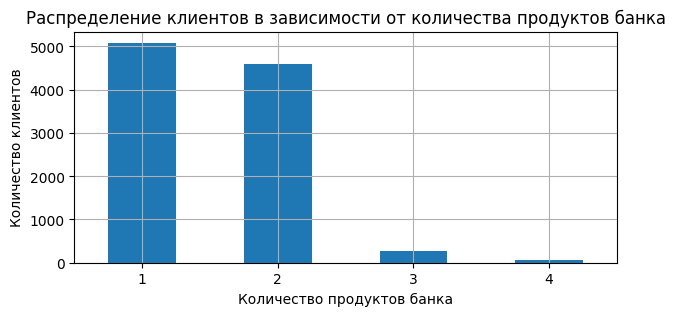

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['products'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение клиентов в зависимости от количества продуктов банка'
)

# Настраиваем оформление графика
plt.xlabel('Количество продуктов банка')
plt.ylabel('Количество клиентов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Из категорий по количеству продуктов две значительно преобладают — теперь это хорошо видно.

Визуализируем распределение в столбце `objects`:

---

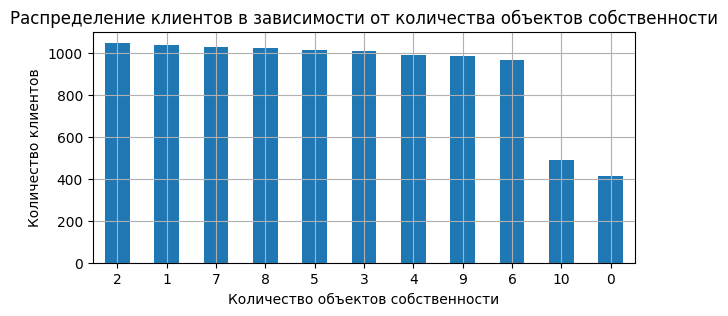

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['objects'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение клиентов в зависимости от количества объектов собственности'
)

# Настраиваем оформление графика
plt.xlabel('Количество объектов собственности')
plt.ylabel('Количество клиентов')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

### 3.2. Непрерывные числовые данные

Теперь посмотрим на данные кредитного рейтинга клиента `score` и его баланса на счёте `balance`. Значения в них относятся к непрерывным вещественным данным.

Начнём с баланса — при знакомстве с подобными данными вначале стоит оценить статические показатели. Для этого используем метод `describe()`:

In [ ]:
# Изучаем статистические показатели столбца balance
print('Статистические показатели столбца balance:')
df['balance'].describe()

Статистические показатели столбца balance:


count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

Можно предположить, что данные баланса имеют распределение, близкое к нормальному. Об этом говорит близость среднего и медианного значений. Однако значение стандартного отклонения довольно высокое — 30095.06, и при среднем 119827.49 это указывает, что данные могут иметь широкий разброс. Разница между минимальным и максимальным значениями это подтверждает.

Дополнительно проверим это и построим гистограмму распределения значений и диаграмму размаха для столбца с балансом.

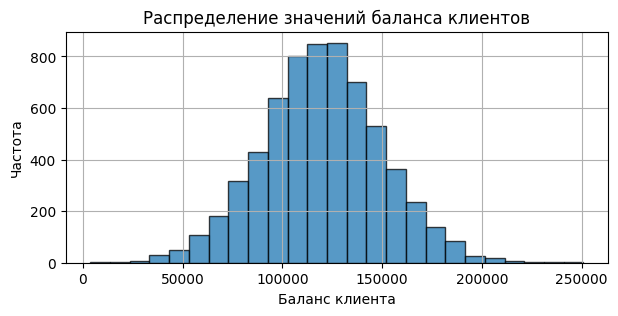

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['balance'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=25, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений баланса клиентов')
plt.xlabel('Баланс клиента')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

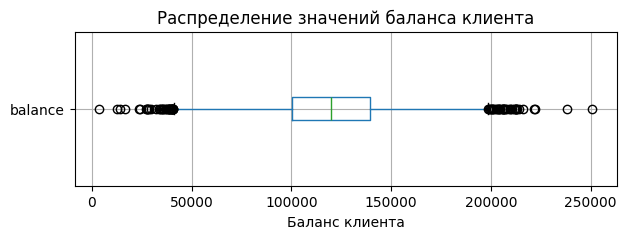

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце balance
df.boxplot(column='balance', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений баланса клиента')
plt.xlabel('Баланс клиента')

# Выводим график
plt.show()

Распределение данных действительно выглядит нормальным, однако характеризуется широким разбросом и «хвостами» как в левой, так и в правой части гистограммы. Такие низкие и высокие значения можно отнести к выбросам. Однако сами значения, как минимальные, так и максимальные, не выглядят ошибкой, и такой баланс у клиента вполне допустим. Поэтому при анализе данных их оставим.

Теперь изучим распределение значений в столбце `score`:

In [ ]:
# Изучаем статистические показатели столбца score
print('Статистические показатели столбца score:')
df['score'].describe()

Статистические показатели столбца score:


count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: score, dtype: float64

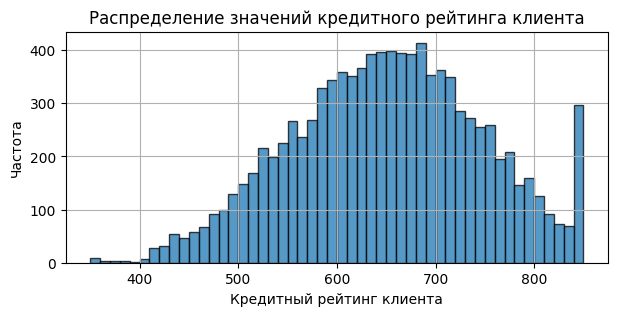

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['score'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=50, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений кредитного рейтинга клиента')
plt.xlabel('Кредитный рейтинг клиента')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

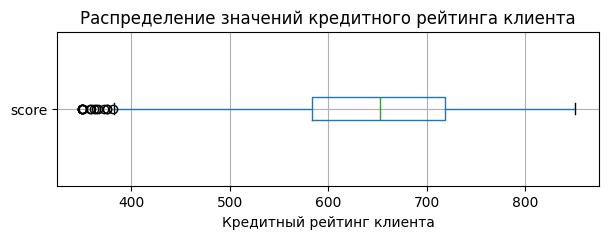

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df.boxplot(column='score', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений кредитного рейтинга клиента')
plt.xlabel('Кредитный рейтинг клиента')

# Выводим график
plt.show()

На гистограмме видно, что распределение значений в столбце `score` приближается к нормальному, но резко увеличивается количество высоких значений, близких к 850. Такой пик может означать, что 850 — это значение-индикатор, которое отражает пропуски. Например, у таких клиентов может не быть кредитного рейтинга, так как ранее они не оформляли кредиты. Может быть и другое объяснение. Допустим, кредитный рейтинг клиента составляет больше 850. Если значение 850 является максимальным, то всем клиентам с рейтингом выше может присваиваться значение 850.

Исходя из диаграммы размаха, минимальные значения можно считать за выбросы, однако такой рейтинг можно допустить для клиентов, которые задерживают выплаты по кредитам или нарушают другие условия кредитования.

Проверим эту особенность данных отдельно и изучим распределение данных для значений рейтинга от 840 до 850:

In [ ]:
# Проверяем распределение данных по значениям столбца score 840 и выше
print('Распределение данных по значениям столбца score 840 и выше:')
df.loc[df['score'] >= 840]['score'].value_counts()

Распределение данных по значениям столбца score 840 и выше:


850    233
841     12
849      8
842      7
844      7
845      6
847      6
846      5
840      5
848      5
843      2
Name: score, dtype: int64

Действительно, данных с рейтингом 850 значительно больше, чем с рейтингом от 840 до 849. Это может подтвердить одну из предложенных гипотез.

Теперь изучим распределение значений в столбце `estimated_salary`:

In [ ]:
# Изучаем статистические показатели столбца estimated_salary
print('Статистические показатели столбца estimated_salary:')
df['estimated_salary'].describe()

Статистические показатели столбца estimated_salary:


count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

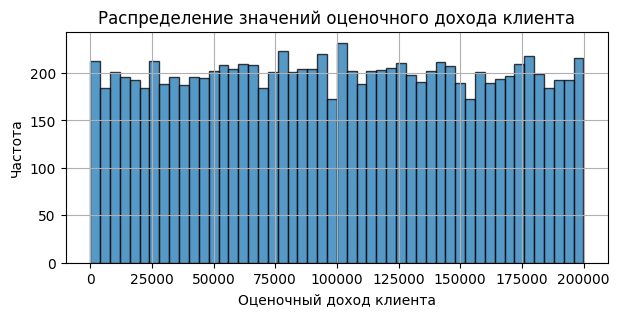

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['estimated_salary'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=50, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений оценочного дохода клиента')
plt.xlabel('Оценочный доход клиента')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

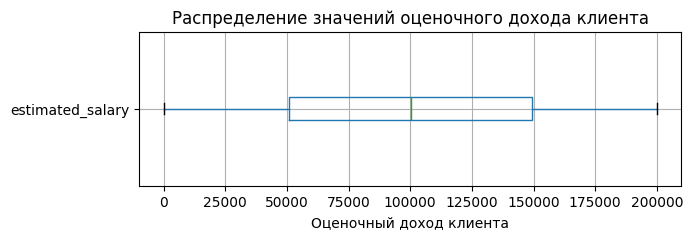

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df.boxplot(column='estimated_salary', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений оценочного дохода клиента')
plt.xlabel('Оценочный доход клиента')

# Выводим график
plt.show()

Значения оценочного дохода клиента имеют равномерное распределение — все значения от 0 до 200000 встречаются примерно одинаковой закономерностью.

Теперь изучим распределение значений в столбце `age`:

In [ ]:
# Изучаем статистические показатели столбца age
print('Статистические показатели столбца age:')
df['age'].describe()

Статистические показатели столбца age:


count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

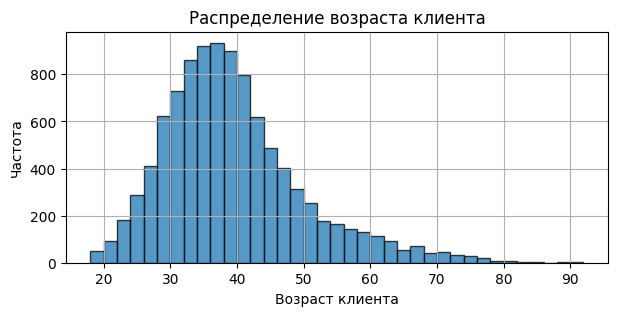

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['age'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=37, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение возраста клиента')
plt.xlabel('Возраст клиента')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

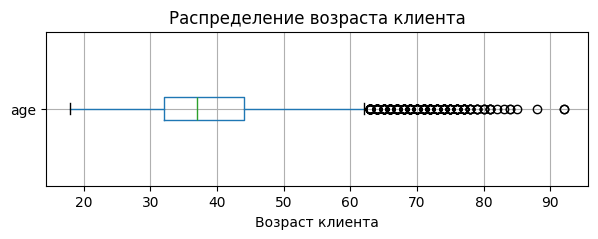

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df.boxplot(column='age', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение возраста клиента')
plt.xlabel('Возраст клиента')

# Выводим график
plt.show()

Распределение значения возраста асимметричное, скошенное вправо. Минимальный возраст — 18 лет, а максимальный — 92, что является корректным. Среднее значение соответствует 39 годам, тогда как медиана — 37. Среднее и медианное значение достаточно близки. По гистограмме размаха видно, что значения выше примерно 62 лет можно считать выбросами.

При анализе данных оставим все значения, поскольку если отбросить группу клиентов старше 62 лет, то можно исключить из анализа целую категорию клиентов пенсионного возраста.

---

### 3.3. Бинарные признаки и категориальные данные

Изучение бинарных признаков и категориальных данных похоже на изучение дискретных числовых данных с небольшим количеством значений. Для бинарных признаков важно оценить, как распределяются клиенты между признаками, а для категориальных данных — убедиться, что в них нет ошибок, а также проверить распределение значений по категориям.

При исследовании таких данных можно использовать метод `value_counts()` с аргументом `normalize=True`, чтобы сравнить доли значений. Изучим значения в столбцах с бинарными признаками, применив метод `value_counts()` для каждого столбца в цикле:

In [ ]:
# Проверяем распределение данных по значениям в столбце
for column in ['credit_card','loyalty','churn']:
    print(f'Распределение данных по значениям столбца {column}:')
    print(df[column].value_counts(normalize=True))
    print()

Распределение данных по значениям столбца credit_card:
1    0.7055
0    0.2945
Name: credit_card, dtype: float64

Распределение данных по значениям столбца loyalty:
1    0.5151
0    0.4849
Name: loyalty, dtype: float64

Распределение данных по значениям столбца churn:
0    0.7963
1    0.2037
Name: churn, dtype: float64



Доля нелояльных клиентов, которые покинули банк, из столбца `churn` составляет около 20%, а доля клиентов без кредитных карт из столбца `credit_card` — около 30%. Распределение данных по уникальным значениям столбца `loyalty` примерно равно — 51% к 49%. Так соотносятся клиенты, которые участвуют в программах лояльности банка, с теми, кто предпочитает в них не участвовать.

Результаты `value_counts()` можно также визуализировать с помощью столбчатой диаграммы. Посмотрим на распределение клиентов по значениям в столбцах с полом клиента и городом:

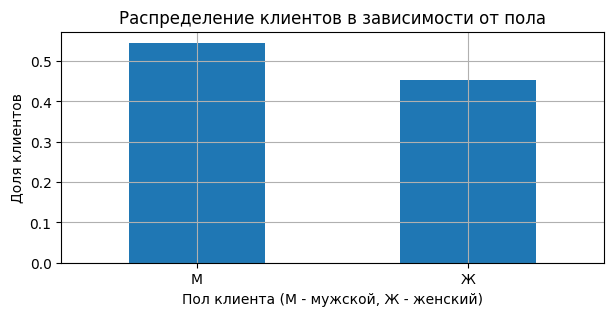

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['gender'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика — столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение клиентов в зависимости от пола'
)

# Настраиваем оформление графика
plt.xlabel('Пол клиента (М - мужской, Ж - женский)')
plt.ylabel('Доля клиентов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

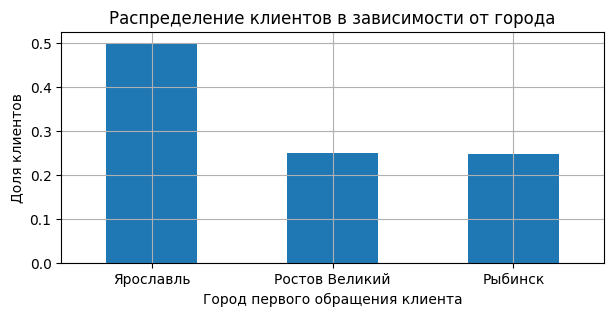

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['city'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение клиентов в зависимости от города'
)

# Настраиваем оформление графика
plt.xlabel('Город первого обращения клиента')
plt.ylabel('Доля клиентов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Судя по диаграммам, примерно 55% клиентов — женщины. Половина клиентов представляют Ярославль, а остальная половина — Ростов Великий и Рыбинск примерно поровну. Около 20% клиентов перестали пользоваться продуктами банка.

Теперь изучим распределение значений в столбце `is_balance`:

In [ ]:
# Проверяем распределение данных по значениям в столбце is_balance
print('Распределение данных по значениям столбца is_balance:')
print(df['is_balance'].value_counts(normalize=True))

Распределение данных по значениям столбца is_balance:
1    0.6383
0    0.3617
Name: is_balance, dtype: float64


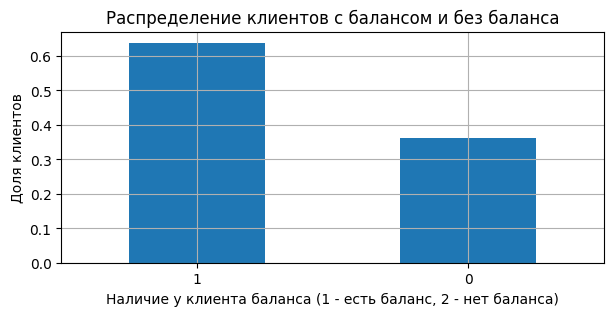

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df['is_balance'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение клиентов с балансом и без баланса'
)

# Настраиваем оформление графика
plt.xlabel('Наличие у клиента баланса (1 - есть баланс, 2 - нет баланса)')
plt.ylabel('Доля клиентов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Около 36% клиентов не имеют баланс.

---

#### Промежуточный вывод

Исследовательский анализ данных позволил сформировать профиль клиента банка:

- Из 10000 проанализированных клиентов банка половина людей проживает в Ярославле, а остальная половина в Ростове Великом и Рыбинске в равном количестве.
- 54% клиентов — женщины, а средний возраст клиентов составляет 39 лет.
- Как правило, клиенты банка пользуются 1–2 продуктами. Средний баланс составляет около 120 тыс. рублей, однако для 35% клиентов нет баланса. При этом 70% клиентов оформляют кредитные карты, а 51% участвует в программах лояльности.

Доля ушедших, или нелояльных, клиентов составляет 20% от всех клиентов банка.

---

### 3.4. Изучение взаимосвязей между данными

В нашей задаче сосредоточимся на профилях двух типов клиентов: лояльных, которые пользуются услугами банка, и нелояльных, которые прекратили ими пользоваться.

#### Изучение корреляции между данными

Чтобы понять, существует ли связь между данными, аналитики часто используют матрицы корреляции для признаков в данных. Для задачи важен столбец `churn`, поэтому будем изучать взаимосвязи данных в этом столбце с другими признаками. В Python существует универсальная библиотека phik, которая помогает изучать связи между данными разного типа, непрерывными и категориальными.

Библиотеку phik можно использовать для анализа связи между значением оттока клиентов и другими признаками. Они как раз представлены разными по природе данными: встречаются непрерывные значения, как баланс, так и категории, например город клиента.

Рассчитаем матрицу корреляции `phi_k` для данных о клиентах банка «Метанпром». Для составления матрицы корреляции были отобраны данные, которые могут влиять на отток клиента: количество объектов собственности и продуктов банка, баланс и оценочная заработная плата клиента, кредитный рейтинг клиента, наличие кредитной карты, участие в программах лояльности, а также возраст, пол и город. В качестве критерия также был использован столбец `is_balance` — это поможет установить, существует ли зависимость между пропуском в столбце `balance` и значением `churn`.

In [ ]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['objects', 'products', 'balance', 'estimated_salary', 'score',
                         'credit_card', 'loyalty', 'is_balance', 'age',
                         'gender', 'city', 'churn']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной churn')
correlation_matrix.loc[correlation_matrix.index != 'churn'][['churn']].sort_values(by='churn', ascending=False)

interval columns not set, guessing: ['objects', 'products', 'balance', 'estimated_salary', 'score', 'credit_card', 'loyalty', 'is_balance', 'age', 'churn']
Корреляционная матрица с коэффициентом phi_k для переменной churn


,churn
products,0.565084
age,0.487524
loyalty,0.241939
is_balance,0.189997
gender,0.165422
balance,0.114133
city,0.104511
score,0.096525
objects,0.022895
estimated_salary,0.000000


Нас интересует связь оттока клиента с другими данными, поэтому на экран был выведен только столбец `churn` итоговой матрицы корреляции `correlation_matrix`. Условие `correlation_matrix.loc[correlation_matrix.index != 'churn']` помогает убрать строку с индексом `'churn'`.

Наибольшая корреляция оттока клиентов наблюдается с количеством продуктов (`0.57`), возрастом клиента (`0.49`) и участием в программах лояльности (`0.24`). Для остальных признаков коэффициент корреляции снижается с `0.19` до `0`.

Важно помнить, что `phi_k` сообщает только о наличии связи между данными. На сам характер связи коэффициент `phi_k` не указывает, поэтому после получения коэффициента следует продолжить анализ. Например, можно предположить, что снижение количества продуктов отрицательно связано с лояльностью клиента — чем меньше продуктов у клиента, тем меньше у него мотивации пользоваться услугами банка. В этом случае связь будет отрицательной. Такую гипотезу можно проверить при анализе данных.

Перед тем как перейти к дальнейшему анализу, визуализируем результат корреляции с помощью тепловой карты и библиотеки seaborn:

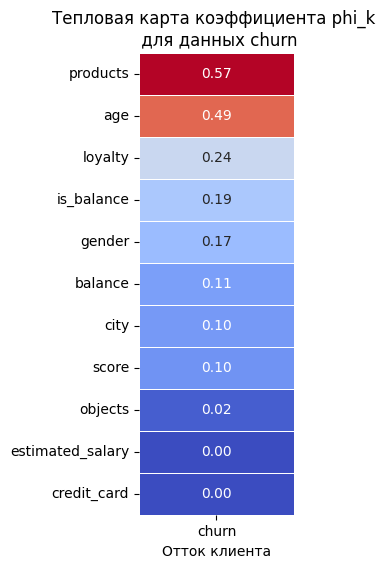

In [ ]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'churn'][['churn']].sort_values(by='churn', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных churn')
plt.xlabel('Отток клиента')

# Выводим график
plt.show()

Теперь корреляция между оттоком клиентов и другими признаками наглядно отображена. Можно продолжить исследование данных.

---

### 3.5. Анализ взаимосвязей между данными

#### Изучаем признаки с небольшим количеством категорий

Изучим, существует ли зависимость между уходом клиента из банка и городом первого обращения. Для этого построим столбчатые диаграммы с разделением по признаку `churn` среди разных городов:

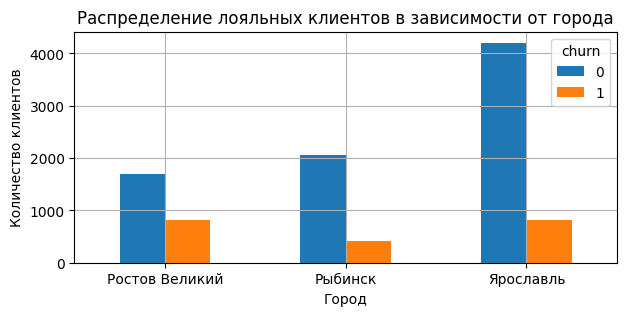

In [ ]:
# Построим график столбчатой диаграммы
grouped = df.groupby('city')['churn'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar',
               title=f'Распределение лояльных клиентов в зависимости от города',
               legend=True,
               ylabel='Количество клиентов',
               xlabel='Город',
               rot=0,
               figsize=(7, 3))
plt.grid()

# Выводим график
plt.show()

Больше всего клиентов в Ярославле. Однако количество клиентов, которые прекратили пользоваться продуктом, в Ярославле примерно такое же, как в Ростове Великом. Получается, что больше всего нелояльных клиентов в Ярославле и Ростове Великом, а в Рыбинске меньше всего.

И всё же такое сопоставление нельзя назвать корректным: клиентов в Ростове Великом и Рыбинске меньше, чем в Ярославле. В этом случае лучше изучить доли нелояльных клиентов от общего числа клиентов в каждом городе. Для этого можно использовать признак `churn`, который содержит значения 1 и 0. Если мы посчитаем сумму в этом столбце, то значение покажет общее количество нелояльных клиентов, а если среднее значение — то их долю. Когда посчитаем среднее значение по столбцу `churn`, перестроим график.

Рассчитаем среднее значение с помощью `df.groupby('city')['churn'].mean()` и визуализируем результат с помощью столбчатой диаграммы:

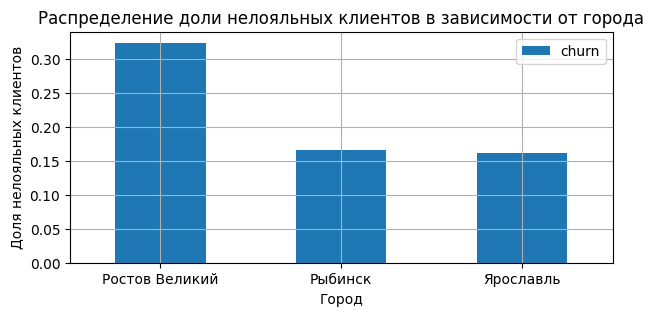

In [ ]:
# Построим график столбчатой диаграммы
grouped = df.groupby('city')['churn'].mean()
grouped.plot(kind='bar',
               title=f'Распределение доли нелояльных клиентов в зависимости от города',
               legend=True,
               ylabel='Доля нелояльных клиентов',
               xlabel='Город',
               rot=0,
               figsize=(7, 3))
plt.grid()

# Выводим график
plt.show()

Видно, что доля нелояльных клиентов больше всего в Ростове Великом — там она составляет около 33%, а в других городах эта доля равна примерно 16%.

Изучая подобные данные, полезно сравнивать значения в каждом сегменте со средним для всех данных — это поможет понять, где метрика уменьшается, а где увеличивается. Что-то подобное вы делали в первом проекте по SQL, когда изучали доли платящих клиентов в разрезе игровой расы персонажа.

Добавим на график линию, которая будет показывать среднее значение:

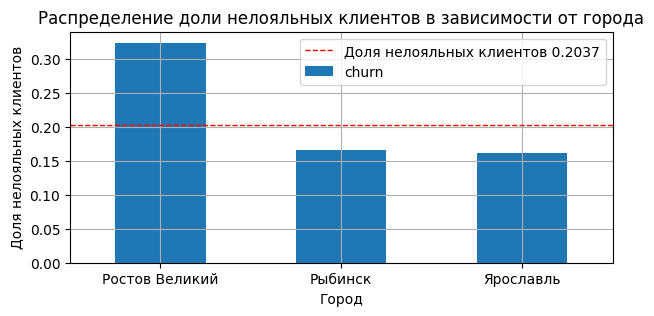

In [ ]:
# Строим график столбчатой диаграммы
grouped = df.groupby('city')['churn'].mean()
grouped.plot(kind='bar',
               title=f'Распределение доли нелояльных клиентов в зависимости от города',
               legend=True,
               ylabel='Доля нелояльных клиентов',
               xlabel='Город',
               rot=0,
               figsize=(7, 3))

# Рассчитываем среднее значение по доле нелояльных клиентов
mean_churn_share = df['churn'].mean()

# Наносим на график линию с средним значением доли нелояльных клиентов
plt.axhline(mean_churn_share, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Доля нелояльных клиентов {round(mean_churn_share,4)}')

plt.grid()
plt.legend()

# Выводим график
plt.show()

Теперь на визуализации видны различия долей нелояльных клиентов в каждом сегменте по отношению к среднему значению.

Из кода для графика можно сделать функцию, ведь подобный анализ будет выполняться и для других признаков:

In [ ]:
# Задаём функцию для анализа данных
def plot_bar_plot(df, groupby, value, aggfunc, title, ylabel, xlabel):
    '''
    Функция для анализа распределения метрики по признакам:
    df - датафрейм с данными для анализа;
    groupby - str, название столбца для группировки данных;
    value - str, название столбца, значение которого будет агрегироваться;
    aggfunc - str, функция агрегации, которая используется для расчёта;
    title - str, заголовок графика;
    ylabel - str, подпись по оси Y;
    xlabel - str, подпись по оси X.
    '''
    grouped = df.groupby(groupby).agg({value:aggfunc})
    grouped.plot(kind='bar',
                   title=title,
                   legend=True,
                   ylabel=ylabel,
                   xlabel=xlabel,
                   rot=0,
                   figsize=(7, 3))

    # Рассчитываем общее значение value по всем данным
    mean_churn_share = df.agg({value:aggfunc})[0]

    # Наносим на график линию с значением value по всем данным
    plt.axhline(mean_churn_share, color='red',
                linestyle='--', linewidth=1,
                label=f'Значение по всем данным {round(mean_churn_share,4)}')

    plt.grid()
    plt.legend()
    plt.show()

Применим функцию и изучим распределение доли нелояльных клиентов в зависимости от количества объектов собственности.

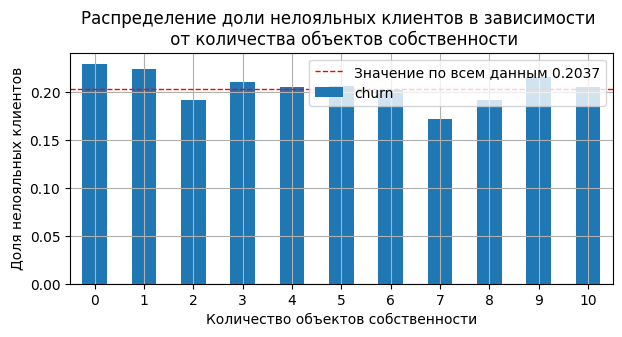

In [ ]:
# Применим функцию и изучим распределение доли нелояльных клиентов в зависимости от количества объектов собственности
title='Распределение доли нелояльных клиентов в зависимости \n от количества объектов собственности'
xlabel='Количество объектов собственности'
ylabel='Доля нелояльных клиентов'

plot_bar_plot(df, 'objects', 'churn', 'mean', title, ylabel, xlabel)

Видно, что нет чёткой зависимости между увеличением количества объектов собственности и изменением доли нелояльных клиентов. Значения находятся примерно около среднего, однако можно отметить тенденцию, что клиенты с одним и двумя объектами собственности более склонны к оттоку.

Применим функцию и изучим распределение доли нелояльных клиентов в зависимости от пола клиента, наличия баланса в банке и кредитной карты, а также от участия в программе лояльности.

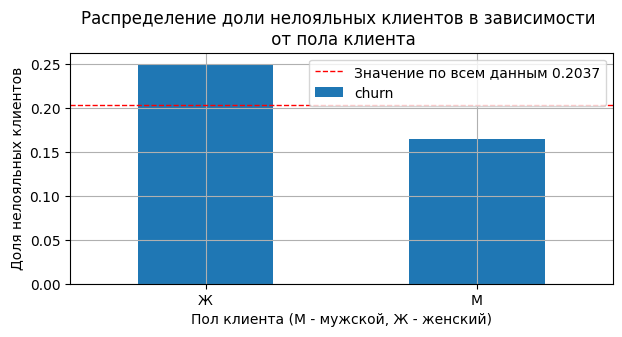

In [ ]:
# Применим функцию и изучим распределение доли нелояльных клиентов в зависимости от поля клиента
plot_bar_plot(df,
              groupby='gender',
              value='churn',
              aggfunc='mean',
              title='Распределение доли нелояльных клиентов в зависимости \n от пола клиента',
              ylabel='Доля нелояльных клиентов',
              xlabel='Пол клиента (М - мужской, Ж - женский)')

Среди женщин выше процент нелояльных клиентов, чем среди мужчин (25% против 16%).

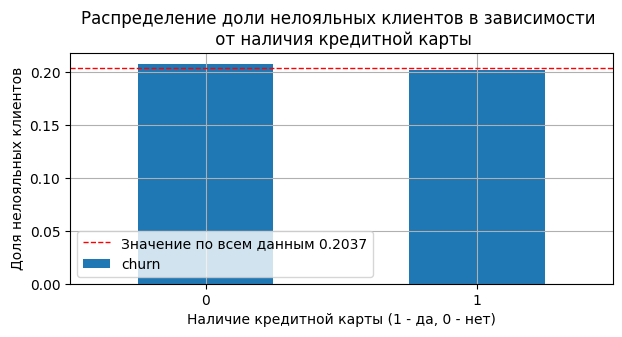

In [ ]:
# Применим функцию и изучим распределение доли нелояльных клиентов в зависимости от наличия кредитной карты
plot_bar_plot(df,
              groupby='credit_card',
              value='churn',
              aggfunc='mean',
              title='Распределение доли нелояльных клиентов в зависимости \n от наличия кредитной карты',
              ylabel='Доля нелояльных клиентов',
              xlabel='Наличие кредитной карты (1 - да, 0 - нет)')

Наличие кредитной карты практически не влияет на доли нелояльных клиентов.

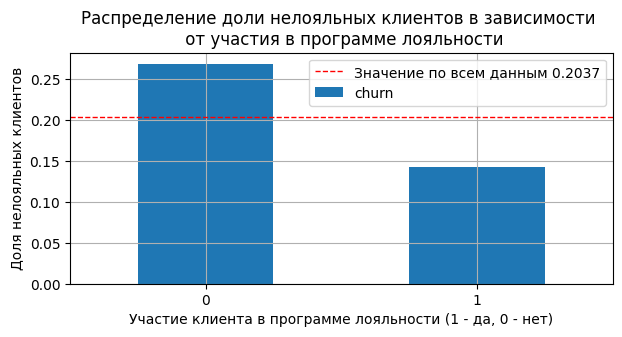

In [ ]:
# Применим функцию и изучим распределение доли нелояльных клиентов в зависимости от участия в программе лояльности
plot_bar_plot(df,
              groupby='loyalty',
              value='churn',
              aggfunc='mean',
              title='Распределение доли нелояльных клиентов в зависимости \n от участия в программе лояльности',
              ylabel='Доля нелояльных клиентов',
              xlabel='Участие клиента в программе лояльности (1 - да, 0 - нет)')

Среди клиентов, которые не участвуют в программе лояльности, больше процент ушедших клиентов, чем среди тех, кто в программе лояльности участвует (27% против 14%)

Оценим распределение доли нелояльных клиентов в зависимости от количества продуктов банка:
    

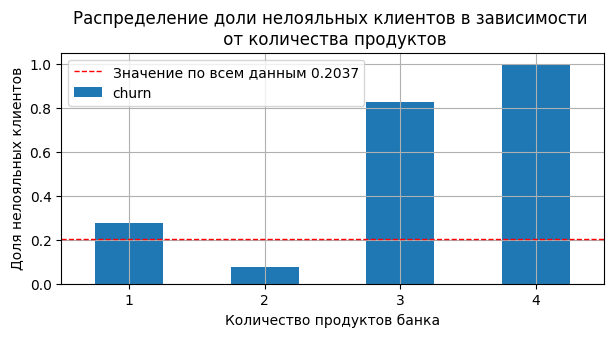

In [ ]:
# Применим функцию и изучим распределение доли нелояльных клиентов в зависимости от количества объектов собственности
plot_bar_plot(df,
              groupby='products',
              value='churn',
              aggfunc='mean',
              title='Распределение доли нелояльных клиентов в зависимости \n от количества продуктов',
              ylabel='Доля нелояльных клиентов',
              xlabel='Количество продуктов банка')

Количество объектов собственности, как правило, не влияет на лояльность клиентов, в отличие от количества продуктов: клиенты с одним продуктом больше склонны к уходу, чем клиенты с двумя продуктами (27% против 8%). Для клиентов с тремя и четырьмя продуктами мало данных, чтобы сделать корректные выводы.

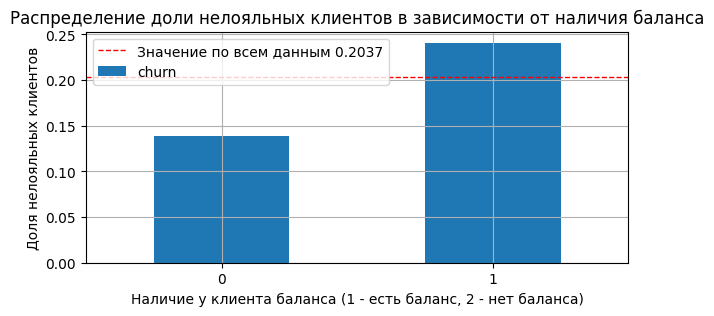

In [ ]:
# Применим функцию и изучим распределение доли нелояльных клиентов в зависимости от участия наличия баланса
plot_bar_plot(df,
              groupby='is_balance',
              value='churn',
              aggfunc='mean',
              title='Распределение доли нелояльных клиентов в зависимости от наличия баланса',
              ylabel='Доля нелояльных клиентов',
              xlabel='Наличие у клиента баланса (1 - есть баланс, 2 - нет баланса)')

Клиенты, для которых не указан баланс, в целом более лояльны банку. Процент нелояльных клиентов в этом сегменте около 14%, тогда как процент нелояльных клиентов среди тех, для кого указан баланс, возрастает до 24%.

#### Изучаем числовые непрерывные данные

Теперь перейдём к непрерывным числовым данным и изучим гистограммы распределения возраста в разрезе лояльных и нелояльных клиентов. У клиента может быть два признака лояльности: он либо ушёл из банка, либо нет. Поэтому в matplotlib необходимо построить два графика по разным значениям признака `churn`. Удобно это сделать в цикле, который будет строить два графика в зависимости от `churn`. Чтобы не прописывать значение `churn` вручную, используем метод `unique()` для определения уникальных значений:

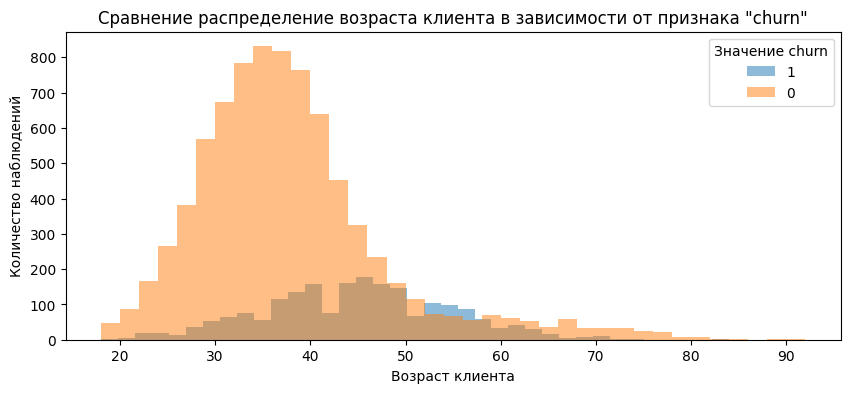

In [ ]:
# Строим гистограмму распределения значений возраста
# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого значения churn
for i in df['churn'].unique():
    # Фильтруем данные по значению столбца churn
    df.loc[df['churn'] == i, 'age'].plot(
        kind='hist',
        bins=37,
        alpha=0.5,
        label=f'{i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределение возраста клиента в зависимости от признака "churn"')
plt.xlabel('Возраст клиента')
plt.ylabel('Количество наблюдений')
plt.legend(title='Значение churn')
plt.show()

Для более информативного представления данных добавили прозрачность `alpha=0.5`. По графику видно, что значений для лояльных клиентов больше, чем для нелояльных, поэтому два распределения имеют разную высоту. Из-за этого сопоставлять их не очень удобно.

Когда сравниваемые выборки неравномерны по количеству наблюдений, для сравнения их распределений можно построить плотность вероятности. Тогда высота каждого столбца будет нормирована таким образом, что сумма площадей всех столбцов будет равна 1. Таким способом удобнее сравнивать выборки разного размера. Для этого можно установить аргумент `density=True`:

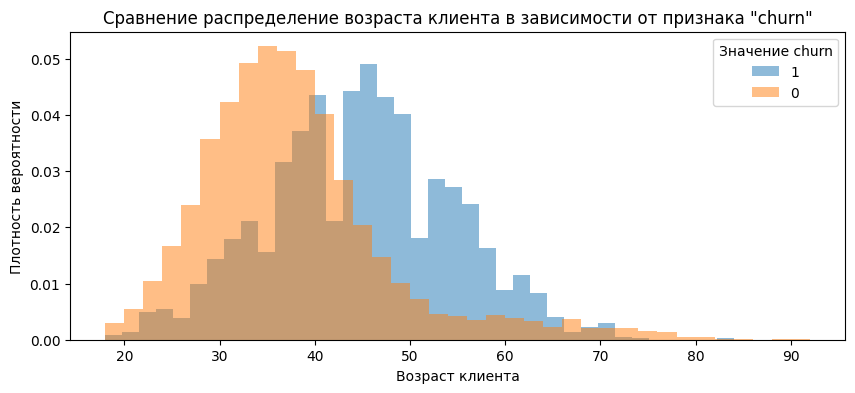

In [ ]:
# Строим гистограмму распределения значений возраста
# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого значения churn
for i in df['churn'].unique():
    # Фильтруем данные по значению столбца churn
    df.loc[df['churn'] == i, 'age'].plot(
        kind='hist',
        density=True,
        bins=37,
        alpha=0.5,
        label=f'{i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределение возраста клиента в зависимости от признака "churn"')
plt.xlabel('Возраст клиента')
plt.ylabel('Плотность вероятности')
plt.legend(title='Значение churn')
plt.show()

Теперь распределения двух выборок сопоставимы между собой. Можно заметить, что распределение выборки с признаком `churn=1` смещено в область более высоких значений.

Сейчас размеры интервалов, или корзин, различаются для разных данных. Лучше сделать их в едином масштабе с заданной шириной, например в два года. Для этого нужно скорректировать параметр `bins` — задать минимальное значение, максимальное значение и шаг. Минимальное и максимальное значения можно взять из общих данных, а шаг задать в два года. Сначала найдём минимальное и максимальное значения:

In [ ]:
# Находим минимальное и максимальное значения
min_value = df['age'].min()
max_value = df['age'].max()

Значение параметра `bins` пропишем как интервал от минимального к максимальному значению с шагом 2: `bins=range(min_value, max_value+1, 2)`. Здесь `+1` нужно для того, чтобы увеличить интервал значений, ведь функция `range()` не использует последнее значение в интервале:

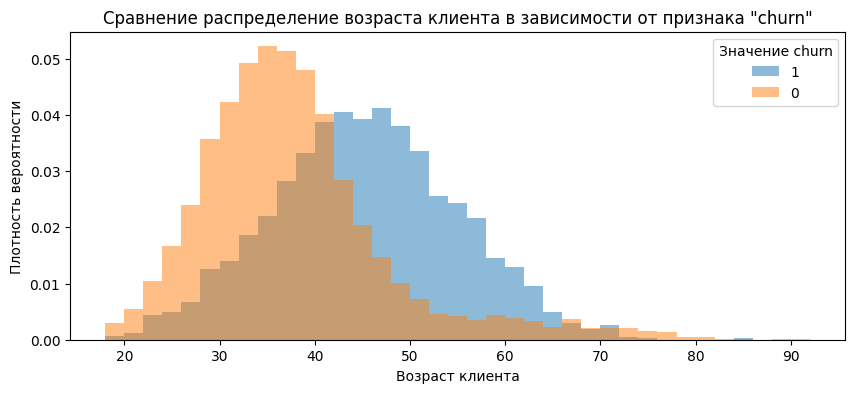

In [ ]:
# Строим гистограмму распределения значений возраста
# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Находим минимальное и максимальное значения
min_value = df['age'].min()
max_value = df['age'].max()

# Строим гистограммы для каждого значения churn
for i in df['churn'].unique():
    # Фильтруем данные по значению столбца churn
    df.loc[df['churn'] == i, 'age'].plot(
        kind='hist',
        density=True,
        bins=range(min_value, max_value+1, 2),
        alpha=0.5,
        label=f'{i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение распределение возраста клиента в зависимости от признака "churn"')
plt.xlabel('Возраст клиента')
plt.ylabel('Плотность вероятности')
plt.legend(title='Значение churn')

plt.show()

При этом важно убедиться, что значения в интервале представлены целыми числами, иначе возникнет ошибка.

На графике видно, что распределение возраста нелояльных клиентов сдвинуто в правую область по отношению к распределению возраста лояльных клиентов: услугами банка предпочитает пользоваться более молодое поколение клиентов возраста от 30 до 40 лет. Эти результаты согласуются с высоким коэффициентом корреляции `phi_k` — 0.49. Теперь мы можем более точно сказать, что с повышением возраста клиент более склонен к оттоку.

Дополнительно вместо гистограммы можно использовать график KDE — оценку функции плотности вероятности для непрерывных данных. KDE представляет гладкую линию, которая показывает вероятность встретить значения в определённом диапазоне. Чем выше линия располагается на графике, тем больше вероятность встретить подобное значение. Сравнение линий KDE двух распределений помогает выявить различия между ними.

Для построения графика KDE можно использовать метод `plot()` c аргументом `kind='kde'`. Модифицируем предыдущий код и построим визуализацию KDE:

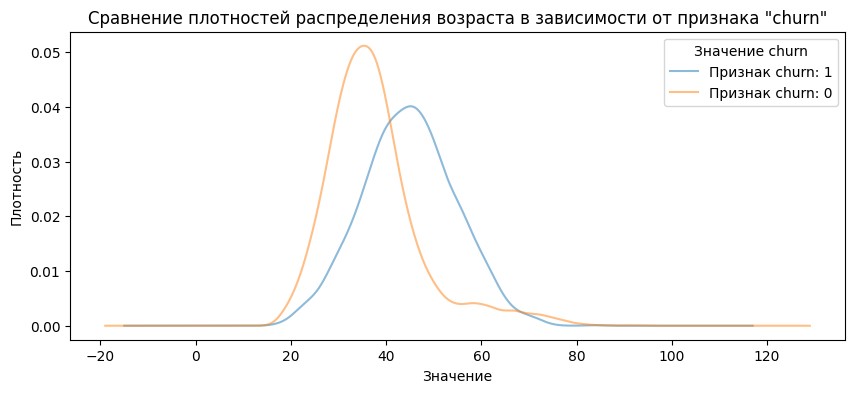

In [ ]:
# Строим гистограмму распределения значений возраста
column = 'age'

# Создаём фигуру графика
plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого значения churn
for i in df['churn'].unique():
    # Фильтруем данные по значению столбца churn
    df.loc[df['churn'] == i, column].plot(
        kind='kde',
        alpha=0.5,
        label=f'Признак churn: {i}',
        legend=True
    )

# Настраиваем внешний вид графика и выводим его на экран
plt.title(f'Сравнение плотностей распределения возраста в зависимости от признака "churn"')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend(title='Значение churn')
plt.show()

Линия KDE для распределения возраста нелояльных клиентов сдвинута вправо по отношению к линии KDE для лояльных клиентов. При этом линия лояльных клиентов выше по значению плотности по сравнению с линией нелояльных клиентов. Это может указывать на разброс значений.

Для более детального анализа данных рассчитаем среднее и медианное значения возраста для лояльных и нелояльных клиентов:

In [ ]:
# Рассчитаем среднее и медианное значения возраста для
# лояльных и нелояльных клиентов
df.groupby('churn').agg({'age':['mean','median']})

age       
            mean median
churn                  
0      37.408389   36.0
1      44.837997   45.0

Действительно, видны различия в среднем и медиане для разных клиентов. Значит, возраст клиента можно использовать для дальнейшего изучения причин оттока.

На основе написанного кода создадим функцию для визуализации данных:

In [ ]:
def plot_hist(df, column, groupby, title, xlabel, ylabel, binwidth, kde=False):
    '''
    Функция для визуализации распределения значений с учётом категорий и линией KDE.
    Параметры:
    df - датафрейм с данными для анализа.
    column - str, название столбца, значения которого будут отображаться на графике.
    groupby - str, название столбца, по которому будет производиться группировка данных.
    binwidth - int, ширина корзины для гистограммы.
    title - str, заголовок графика.
    xlabel - str, подпись по оси X.
    ylabel - str, подпись по оси Y.
    kde - наложение графика KDE на гистограмму.
    '''

    # Создаём график
    plt.figure(figsize=(7, 3))

    # Находим минимальное и максимальное значения
    min_value = int(df[column].min())
    max_value = round(df[column].max())

    for value in df[groupby].unique():
        # Фильтруем данные по значению столбца churn
        df.loc[df[groupby] == value, column].plot(
            kind='hist',
            density=True,
            bins=range(min_value, max_value+1, binwidth),
            alpha=0.5,
            label=f'{groupby}: {value}',
            legend=True
        )

    for value in df[groupby].unique():
        if kde == True:
            df.loc[df[groupby] == value, column].plot(
                kind='kde',
                label=f'KDE {value}',
            )

    # Настраиваем график
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.xlim(min_value, max_value)

    plt.grid()
    plt.show()

Посмотрим на распределение значений оценочной заработной платы и суммы баланса в зависимости от оттока:

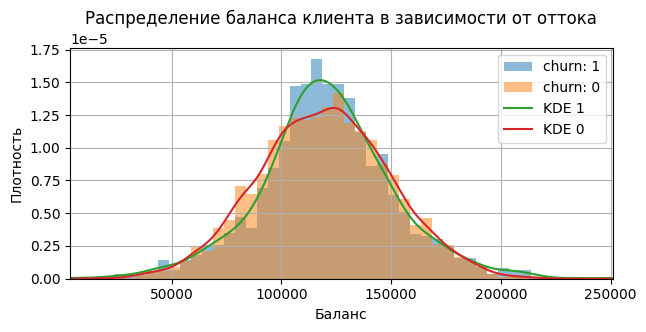

In [ ]:
# Изучаем распределение значений баланса клиентов в зависимости от их лояльности
plot_hist(
    df=df,
    column='balance',
    groupby='churn',
    binwidth=5000,
    title='Распределение баланса клиента в зависимости от оттока',
    xlabel='Баланс',
    ylabel='Плотность',
    kde=True
)

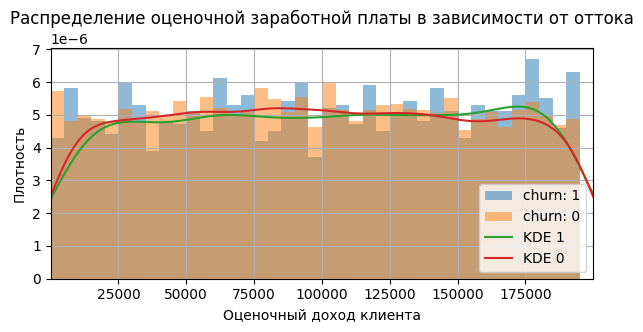

In [ ]:
# Построим гистограмму распределения данных и линию KDE с помощью фунции plot_hist
plot_hist(
    df=df,
    column='estimated_salary',
    groupby='churn',
    binwidth=5000,
    title='Распределение оценочной заработной платы в зависимости от оттока',
    xlabel='Оценочный доход клиента',
    ylabel='Плотность',
    kde=True
)

Распределение значений баланса лояльных и нелояльных клиентов примерно равно. Предполагаем, что баланс вряд ли играет определяющую роль при уходе клиента из банка, как и оценочная заработная плата.

Оценим распределение значений кредитного рейтинга клиента в зависимости от оттока:

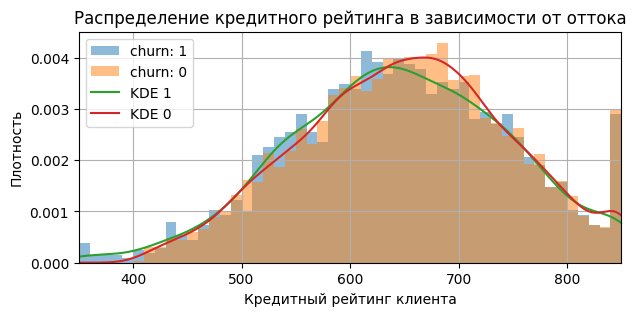

In [ ]:
# Построим гистограмму распределения данных и линию KDE с помощью фунции plot_hist
plot_hist(
    df=df,
    column='score',
    groupby='churn',
    binwidth=10,
    title='Распределение кредитного рейтинга в зависимости от оттока',
    xlabel='Кредитный рейтинг клиента',
    ylabel='Плотность',
    kde=True
)

Значение кредитного рейтинга в целом не влияет на отток клиентов, хотя можно отметить тенденцию к тому, среди лояльных клиентов большая часть клиентов имеет кредитный рейтинг ближе к 700, а среди нелояльных — к 600, хотя средние значения достаточно близки.

#### Поиск закономерностей с помощью диаграммы рассеяния

Ещё один инструмент для поиска закономерностей в данных — диаграмма рассеяния, или scatter plot. На диаграмме рассеяния по каждой оси откладываются значения двух переменных, что помогает заметить возможные связи между ними. Обычно таким образом сравнивают две непрерывные переменные.

Например, если отложить возраст клиентов по одной оси, а уровень накоплений по другой, можно увидеть, склонны ли клиенты старше определённого возраста иметь более высокие накопления. Это полезно для изучения финансовых привычек разных возрастных групп.

Диаграммы рассеяния помогают аналитикам искать закономерности в данных и определять, существует ли положительная или отрицательная корреляция между переменными или её вообще нет.

Посмотрим на взаимосвязь между возрастом и балансом клиента:

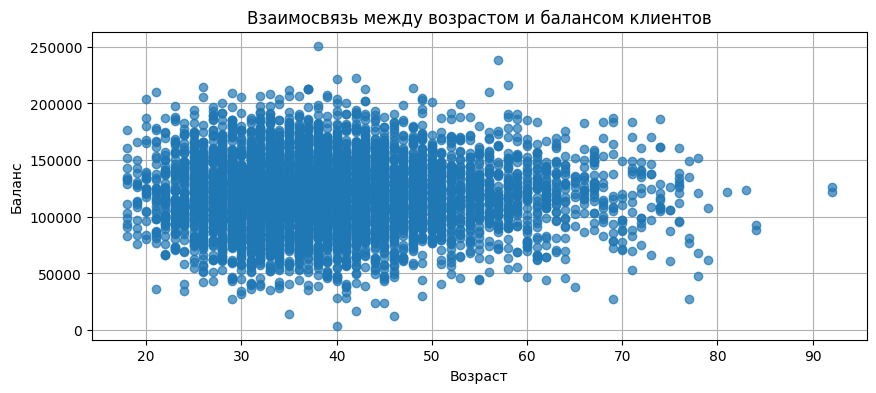

In [ ]:
# Создаём контейнер графика
plt.figure(figsize=(10, 4))

# Строим линейный график
plt.plot(df['age'],
         df['balance'],
         marker='o', # Задаём стиль маркера
         linestyle='', # Делаем линии между точками невидимыми
         alpha=0.7)

# Добавляем заголовок и метки осей
plt.title('Взаимосвязь между возрастом и балансом клиентов')
plt.xlabel('Возраст')
plt.ylabel('Баланс')
plt.grid()


# Отображаем график
plt.show()

Для построения графика метод `plot()` применили к библиотеке matplotlib. Посмотрим на результат. Как видно из графика, данные не показывают какую-либо взаимосвязь. Посмотрим на связи с признаком лояльности клиента:

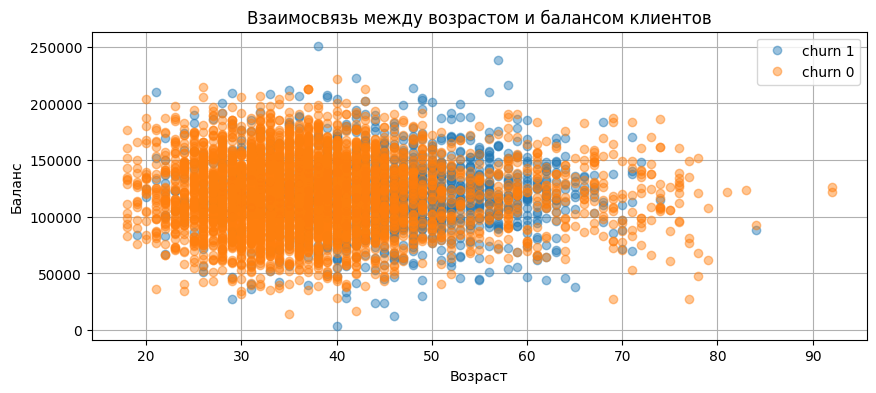

In [ ]:
# Создаём контейнер графика
plt.figure(figsize=(10, 4))

# Строим гистограммы для каждого значения churn
for i in df['churn'].unique():
    # Фильтруем данные по значению столбца churn
    plot_data = df.loc[df['churn'] == i]

    # Строим линейный график
    plt.plot(plot_data['age'],
             plot_data['balance'],
             marker='o', # Задаём стиль маркера
             linestyle='', # Делаем линии между точками невидимыми
             label=f'churn {i}',
             alpha=0.45)

# Добавляем заголовок и метки осей
plt.title('Взаимосвязь между возрастом и балансом клиентов')
plt.xlabel('Возраст')
plt.ylabel('Баланс')
plt.legend()
plt.grid()

# Отображаем график
plt.show()

Нелояльные клиенты образуют облако точек в центральной части диаграммы — это преобладающий интервал возраста, который составляет 40–60 лет. Однако никакой видимой закономерности от баланса и на этом графике, увы, нельзя зафиксировать.

---

#### Промежуточные выводы

Анализ взаимосвязи данных показал, что:

- Наибольший процент нелояльных клиентов фиксируется среди клиентов из Ростова Великого (32%), при этом среди женщин также выше процент нелояльных клиентов, чем среди мужчин (25% против 16%). Также существенное различие можно отметить среди возрастных групп клиентов: среди нелояльных клиентов преобладаю клиенты с возрастом 40–50 лет, тогда как среди лояльных — 30–40 лет.
- Сумма баланса клиента и его оценочная заработная плата не влияют на его лояльность. Однако клиенты, для которых не указан баланс, в целом более лояльны банку. Процент нелояльных клиентов в этом сегменте около 14%, тогда как процент нелояльных клиентов среди тех, для кого указан баланс, возрастает до 24%.
- Наличие кредитной карты и значение кредитного рейтинга в целом не влияет на отток клиентов, хотя можно отметить тенденцию к тому, среди лояльных клиентов большая часть клиентов имеет кредитный рейтинг ближе к 700, а среди нелояльных — к 600, хотя средние значения достаточно близки.
- Среди клиентов, которые не участвуют в программе лояльности, больше процент ушедших клиентов, чем среди тех, кто в программе лояльности участвует (27% против 14%).
- Количество объектов собственности, как правило, не влияет на лояльность клиентов, в отличие от количества продуктов: клиенты с одним продуктом больше склонны к уходу, чем клиенты с двумя продуктами (27% против 8%). Для клиентов с тремя и четырьмя продуктами мало данных, чтобы сделать корректные выводы.

---

## Подведём итоги

В ходе исследования проанализировали данные 10000 клиентов банка «Метанпром» из трёх городов. Данные включали персональную информацию клиентов и особенности использования услуг банка. Акцент исследования был на том, чтобы найти взаимосвязи между уходом клиентов и другими факторами. Среди них: возраст и город проживания клиента, текущий баланс и оценочная заработная плата, кредитный рейтинг и наличие кредитной карты, участие в программе лояльности, количество объектов недвижимости и продуктов банка.

### Общий профиль клиента банка

Исследовательский анализ данных позволил сформировать профиль клиента банка:

- Из 10000 проанализированных клиентов банка половина людей проживает в Ярославле, а остальная половина в Ростове Великом и Рыбинске в равном количестве.

- 54% клиентов — женщины, а средний возраст клиентов составляет 39 лет.

- Как правило, клиенты банка пользуются 1–2 продуктами. Средний баланс составляет около 120 тыс. рублей, однако для 35% клиентов нет баланса. При этом 70% клиентов оформляют кредитные карты, а 51% участвует в программах лояльности.

Ушедшие, или нелояльные, клиенты составляют 20% от всех клиентов банка.

### Факторы, влияющие на отток клиентов из банка

На значение процента клиентов, ушедших в отток, положительно влияют несколько факторов: регион регистрации клиента, его возраст и пол, а также наличие баланса в банке, участие в программе лояльности и количество используемых продуктов.

Среди ушедших клиентов преобладают:

- люди из Ростова Великого — это 32% от всех клиентов региона;

- женщины — это 25% по сравнению с 16% для клиентов-мужчин;

- клиенты возрастом от 40 до 50 лет.

Ушедшие клиенты чаще других имеют баланс в банке, не участвуют в программах лояльности и пользуются одним банковским продуктом.

### Рекомендации

В качестве рекомендаций стоит обратить внимание на удержание клиентов возраста 40–50 лет. Им можно предложить более выгодные условия кредитования или разработать для них специальные банковские продукты и увеличить вовлечённость в программы лояльности.

Дополнительно можно провести более детальную сегментацию, чтобы выделить конкретные группы клиентов.
